In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)

In [297]:
df_all = pd.read_csv('.\clients.csv')

In [298]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [299]:
df_all.isnull().sum()

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

In [300]:
contains_nulls = df_all[df_all.isna().any(axis=1)]

print(f"Имеется {contains_nulls.shape[0]} строк с пропущенными данными.")
contains_nulls

Имеется 31 строк с пропущенными данными.


,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
41,1032,1,2005,1,Apartment,32,782.25,"$ 215,410.28",Sold,C0015,Individual,Lauryn,Patrick,36.0,36-45,1969.0,10.0,30.0,F,Belgium,NaN,Home,2,No,Agency
58,2025,2,2007,2,Apartment,25,927.83,"$ 315,733.15",Sold,C0070,Individual,Aleksandra,Karenina,40.0,36-45,1967.0,6.0,13.0,F,Russia,NaN,Home,1,No,Agency
64,2005,2,2006,9,Apartment,5,785.48,"$ 257,183.48",Sold,C0047,Individual,Alejandra,Greer,41.0,36-45,1965.0,1.0,11.0,F,Denmark,NaN,Investment,1,No,Agency
76,3049,3,2007,4,Apartment,49,1283.45,"$ 338,181.18",Sold,C0084,Individual,Diego,Mendez,42.0,36-45,1965.0,5.0,12.0,M,Mexico,NaN,Home,3,No,Agency
114,2003,2,2006,12,Apartment,3,927.08,"$ 289,727.99",Sold,C0063,Individual,Piotr,Aleksandrov,51.0,46-55,1955.0,12.0,2.0,M,Russia,NaN,Investment,3,No,Agency
139,3050,3,2006,11,Apartment,50,977.87,"$ 248,274.31",Sold,C0059,Individual,Elena,Petrova,57.0,56-65,1949.0,6.0,22.0,F,Russia,NaN,Home,3,Yes,Agency
146,2019,2,2007,3,Apartment,19,649.80,"$ 177,555.06",Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
147,2021,2,2007,4,Apartment,21,785.48,"$ 217,748.48",Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
148,2027,2,2007,4,Apartment,27,785.48,"$ 247,739.44",Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website
149,2052,2,2007,3,Apartment,52,1615.29,"$ 484,458.03",Sold,C0079,Individual,Xavier,Faulkner,60.0,56-65,1947.0,5.0,24.0,M,Canada,NaN,Investment,5,No,Website


In [301]:
def get_inf_count(df):
    return {col : df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns}
get_inf_count(df)

{'ID': 0,
 'Building': 0,
 'Year of sale': 0,
 'Month of sale': 0,
 'Type of property': 0,
 'Property number': 0,
 'Area (ft.)': 0,
 'Price': 0,
 'Status': 0,
 'Customer ID': 0,
 'Entity': 0,
 'Name': 0,
 'Surname': 0,
 'Age at time of purchase': 0,
 'Age Interval': 0,
 'Y': 0,
 'M': 0,
 'D': 0,
 'Gender': 0,
 'Country': 0,
 'State': 0,
 'Purpose': 0,
 'Deal satisfaction': 0,
 'Mortgage': 0,
 'Source': 0}

In [302]:
df_all.describe(include=['object', 'bool'])

,Type of property,Price,Status,Customer ID,Entity,Name,Surname,Age Interval,Gender,Country,State,Purpose,Mortgage,Source
count,195,195,195,195,195,195,195,178,178,195,181,195,195,195
unique,2,194,1,162,2,159,156,6,2,9,9,2,2,3
top,Apartment,"$ 460,001.26",Sold,C0174,Individual,Marleez,Co,36-45,M,USA,California,Home,No,Website
freq,188,2,195,9,178,9,17,52,108,165,119,119,134,119


In [303]:
df_all.describe()

,ID,Building,Year of sale,Month of sale,Property number,Area (ft.),Age at time of purchase,Y,M,D,Deal satisfaction
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,899.867128,46.151685,1960.325843,6.752809,15.449438,3.605128
std,1244.617996,1.243434,1.072941,3.378674,14.830832,261.489550,12.841692,12.835575,3.450312,8.457285,1.363355
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,19.000000,1931.000000,1.000000,1.000000,1.000000
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,739.860000,37.000000,1950.250000,4.000000,8.000000,3.000000
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,785.480000,45.000000,1962.000000,6.000000,15.000000,4.000000
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,1075.460000,55.000000,1969.750000,9.750000,23.750000,5.000000
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,76.000000,1986.000000,15.000000,31.000000,5.000000


In [304]:
df_all.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

Замечания по входных данных:
1. Столбцы Y, M, D типа str
2. Название столбца "Age Interval" с пробелом в конце
3. Столбец Price типа str
4. В столбце Country присутствуют значения с пробелом в конце
5. Имеются пропуски в данных. Если клиент юрлицо - но отсутствуют значения Age at time of purchase, Age Interval, Y, M, D, Gender. Если Country != 'USA' отсутствуют значения State

In [305]:
df_all.rename(columns={'Age Interval ':'Age Interval'}, inplace=True)
df_all.Price = df_all.Price.replace('[\$,]', '', regex=True).astype('float')
df_all.Gender = df_all.Gender.replace({'M': 'Male', 'F': 'Female'})
df_all.Country = df_all.Country.apply(lambda x: x.strip())

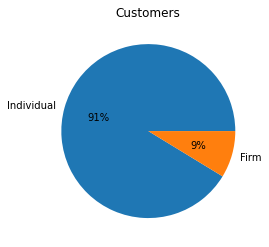

In [306]:
entity_counts = df_all['Entity'].value_counts()
plt.pie(entity_counts.values, labels=entity_counts.index, autopct='%.0f%%')
plt.title("Customers")
plt.show()

posx and posy should be finite values
posx and posy should be finite values


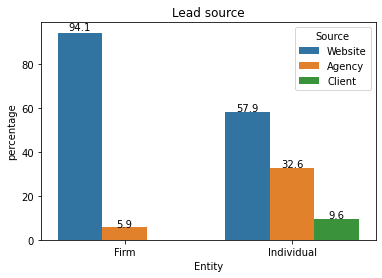

In [307]:
source_counts = (df_all.groupby(['Entity'])['Source']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Entity'))
p = sns.barplot(x="Entity", y="percentage", hue="Source", data=source_counts)
_ = plt.setp(p.get_xticklabels(), rotation=0)
plt.title('Lead source')
show_values(p)

In [308]:
df = df_all[df_all['Entity'] == 'Individual'].copy()

In [309]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

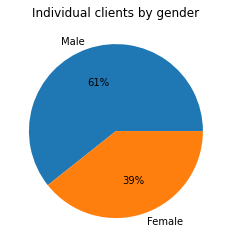

In [310]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%.0f%%')
plt.title("Individual clients by gender")
plt.show()

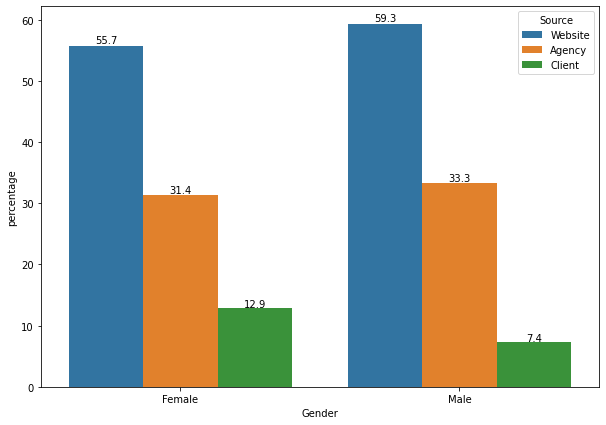

In [311]:
g_source_counts = (df.groupby(['Gender'])['Source']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Gender'))

plt.figure(figsize=(10, 7))
ax = sns.barplot(x="Gender", y="percentage", hue="Source", data=g_source_counts)
show_values(ax)

Тип Source практически не зависит от пола

In [312]:
age_counts = (df.groupby(['Gender'])['Age Interval']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Age Interval'))

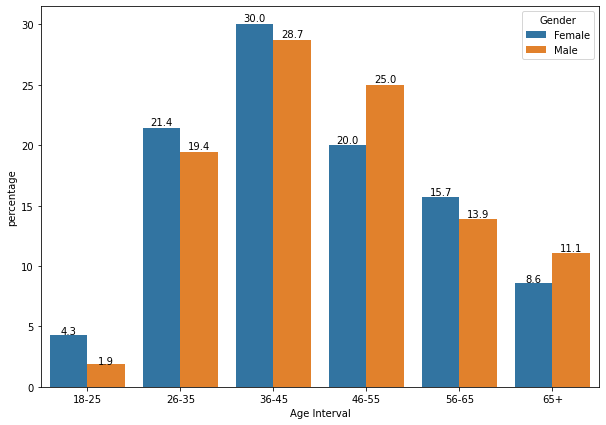

In [313]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(x="Age Interval", y="percentage", hue="Gender", data=age_counts)
show_values(ax)

In [315]:
pd.crosstab(df['Gender'], df['Mortgage'], margins=True)

Mortgage,No,Yes,All
Gender,,,
Female,42,28,70
Male,79,29,108
All,121,57,178


In [316]:
df['Type of property'].value_counts()

Apartment    176
Office         2
Name: Type of property, dtype: int64

In [317]:
df['Purpose'].value_counts(normalize=True)

Home          0.662921
Investment    0.337079
Name: Purpose, dtype: float64

In [318]:
pd.crosstab(df_all['Entity'], df_all['Purpose'], margins=True)

Purpose,Home,Investment,All
Entity,,,
Firm,1,16,17
Individual,118,60,178
All,119,76,195


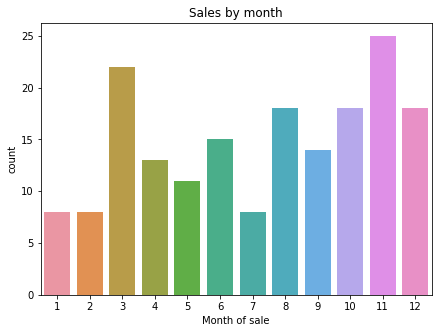

In [319]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Month of sale', data=df).set(title='Sales by month')

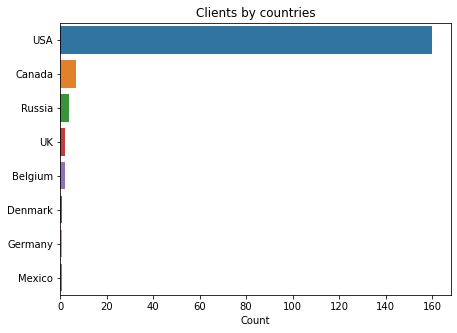

In [320]:
country_counts = df.Country.value_counts()
plt.figure(figsize=(7, 5))
plt.xlabel('Count')
ax = sns.barplot(x=country_counts.values, y=country_counts.index).set(title='Clients by countries')

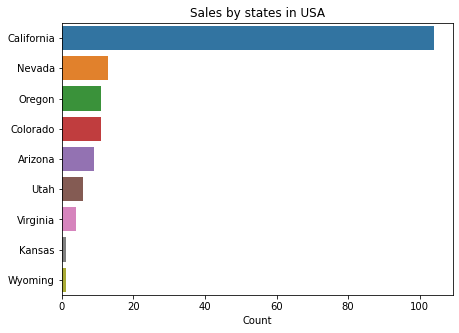

In [321]:
states_counts = df[df['Country'] == 'USA']['State'].value_counts()
plt.figure(figsize=(7, 5))
plt.xlabel('Count')
ax = sns.barplot(x=states_counts.values, y=states_counts.index).set(title='Sales by states in USA')

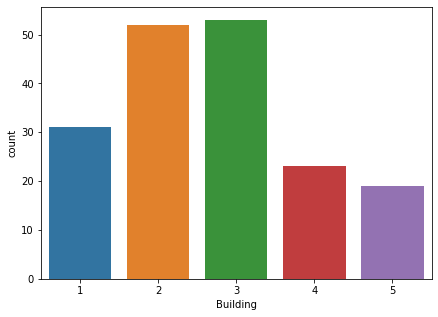

In [322]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Building', data=df)

In [323]:
print('Area: mode {}, median {}'.format(df['Area (ft.)'].mode().iloc[0], df['Area (ft.)'].median()))
print('Price: mean {:.2f} $'.format(df['Price'].mean()))

Area: mode 781.07, median 792.53
Price: mean 270965.43 $


In [324]:
pd.crosstab(df['Building'], df['Type of property'], margins=True)

Type of property,Apartment,Office,All
Building,,,
1,29,2,31
2,52,0,52
3,53,0,53
4,23,0,23
5,19,0,19
All,176,2,178


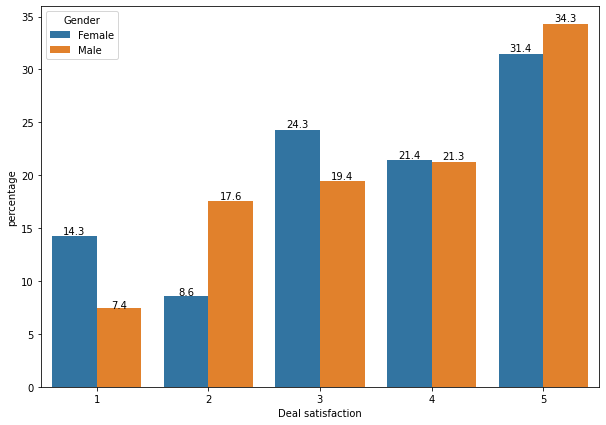

In [325]:
satisf_counts = (df.groupby(['Gender'])['Deal satisfaction']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Deal satisfaction'))
plt.figure(figsize=(10, 7))
ax = sns.barplot(x="Deal satisfaction", y="percentage", hue="Gender", data=satisf_counts)
show_values(ax)

# Вывод
---
Типичный портрет целевого клиента компании. 
В 91% случаев это частное лицо, преимущественно мужского пола (61%) 36-45 лет, который покупает квартиру 2-3 Building (2-3 комнатную?) площадью 790 футов средней стоимостью 270965.43$
в Калифорнии, США. Не пользуется ипотекой. Цель покупки в 66% случаев для проживания, 34% для инвестиций. Источник лида как правило веб-сайт (59%). В половине случаев удовлетворенность сделкой составляет 4-5 баллов.
